In [466]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.mixture import GaussianMixture
from sklearn.metrics import log_loss
from scipy.stats import gaussian_kde

# Read the data

In [247]:
df = pd.read_csv('data.csv')
M_T = df.M_T.to_numpy()

# Data visualization

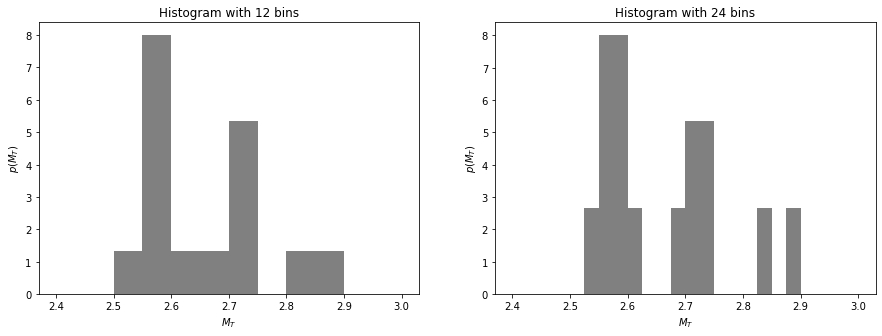

In [248]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.hist(M_T, bins=12, range=[2.4,3], density=True, color='grey')
plt.xlabel('$M_T$')
plt.ylabel('$p(M_T)$')
plt.title('Histogram with 12 bins')

plt.subplot(1,2,2)
plt.hist(M_T, bins=24, range=[2.4,3], density=True, color='grey')
plt.xlabel('$M_T$')
plt.ylabel('$p(M_T)$')
plt.title('Histogram with 24 bins')

plt.show()

In [270]:
# data points to plot pdf
x = np.linspace(2.4,3,1000)

# Fit Gaussian distribution

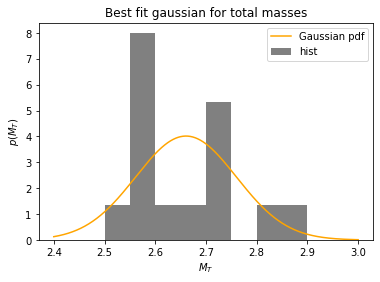

In [271]:
loc_gau, scale_gau = stats.norm.fit(M_T)
pdf_gau = stats.norm.pdf(x, loc=loc_gau, scale=scale_gau)
plt.hist(M_T, bins=12, range=[2.4,3], density=True, label='hist', color='grey')
plt.plot(x, pdf_gau, label='Gaussian pdf',color='orange')
plt.title('Best fit gaussian for total masses')
plt.xlabel('$M_T$')
plt.ylabel('$p(M_T)$')
plt.legend()
plt.show()

# Best fit GMM with two components

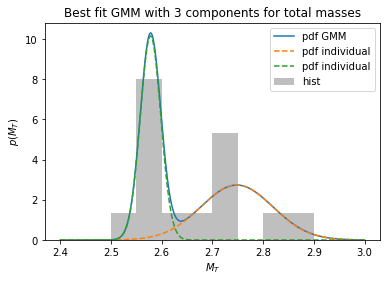

In [272]:
gmm2 = GaussianMixture(n_components=2, random_state=0).fit(M_T.reshape(-1,1))
logprob = gmm2.score_samples(x.reshape(-1, 1))
responsibilities = gmm2.predict_proba(x.reshape(-1, 1))
pdf_gmm2 = np.exp(logprob)
pdf_gmm2_individual = responsibilities * pdf_gmm2[:, np.newaxis]
plt.hist(M_T, bins=12, range=[2.4,3], density=True, label='hist', color='grey', alpha=0.5)
plt.plot(x, pdf_gmm2, '-', label='pdf GMM')
plt.plot(x, pdf_gmm2_individual, '--', label='pdf individual')
plt.title('Best fit GMM with 3 components for total masses')
plt.xlabel('$M_T$')
plt.ylabel('$p(M_T)$')
plt.legend()
plt.show()

# Best fit GMM with three components

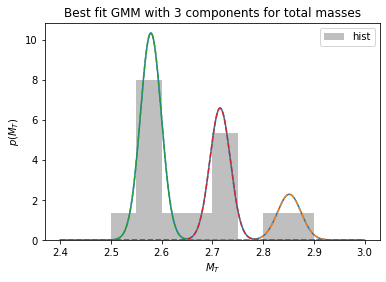

In [273]:
gmm3 = GaussianMixture(n_components=3, random_state=0).fit(M_T.reshape(-1,1))
logprob = gmm3.score_samples(x.reshape(-1, 1))
responsibilities = gmm3.predict_proba(x.reshape(-1, 1))
pdf_gmm3 = np.exp(logprob)
pdf_individual = responsibilities * pdf_gmm3[:, np.newaxis]
plt.hist(M_T, bins=12, range=[2.4,3], density=True, label='hist', color='grey', alpha=0.5)
plt.plot(x, pdf_gmm3, '-')
plt.plot(x, pdf_individual, '--')
plt.title('Best fit GMM with 3 components for total masses')
plt.xlabel('$M_T$')
plt.ylabel('$p(M_T)$')
plt.legend()
plt.show()

# Likelihood ratio test

In [274]:
LR1 = np.prod(stats.norm.pdf(M_T,loc_gau,scale_gau))/np.prod(np.exp(gmm2.score_samples(M_T.reshape(-1, 1))))
print('Likelihood ratio L_1/L_2 = ',LR1)

Likelihood ratio L_1/L_2 =  0.004436984030456209


In [275]:
LR2 = np.prod(np.exp(gmm2.score_samples(M_T.reshape(-1, 1))))/np.prod(np.exp(gmm3.score_samples(M_T.reshape(-1, 1))))
print('Likelihood ratio L_2/L_3 = ',LR2)

Likelihood ratio L_2/L_3 =  0.030271001310531995


# Information criteria: AICc and BIC

In [276]:
# AICc
def computeAICc(logL, n_coeff, n_data):
    return -2 *logL + 2*n_coeff + (2*n_coeff *(n_coeff+1)/(n_data-n_coeff-1))

# BIC
def computeBIC(logL, n_coeff, n_data):
    return -2*logL + n_coeff * np.log(n_data)

In [332]:
print('AICc for gaussian distribution is ',computeAICc(np.sum(stats.norm.logpdf(M_T,loc_gau,scale_gau)), 2, len(M_T)))

AICc for gaussian distribution is  -21.706058072886833


In [333]:
print('AICc for GMM with 2 components ',computeAICc(np.sum(gmm2.score_samples(M_T.reshape(-1, 1))), 5, len(M_T)))

AICc for GMM with 2 components  -20.8749522177558


In [416]:
print('AICc for GMM with 3 components ',computeAICc(np.sum(gmm3.score_samples(M_T.reshape(-1, 1))), 8, len(M_T)))

AICc for GMM with 3 components  -4.536749038805688


In [334]:
print('BIC for gaussian distribution',computeBIC(np.sum(stats.norm.logpdf(M_T,loc_gau,scale_gau)), 2, len(M_T)))

BIC for gaussian distribution -21.289957670682412


In [337]:
print('BIC for GMM with 2 components ',computeBIC(np.sum(gmm2.score_samples(M_T.reshape(-1, 1))), 5, len(M_T)))

BIC for GMM with 2 components  -24.001367878911417


In [415]:
print('BIC for GMM with 3 components ',computeBIC(np.sum(gmm3.score_samples(M_T.reshape(-1, 1))), 8, len(M_T)))

BIC for GMM with 3 components  -22.872347429988007


# Leave One Out cross validation

In [281]:
for i in range(15):
    idx = 0
    for j in range(15):
        if i != j:
            M_T_LeaveOneOut[i,idx] = M_T[j]
            idx += 1

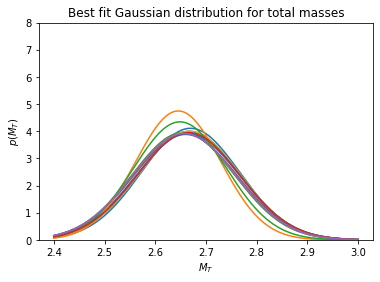

In [284]:
for i in M_T_LeaveOneOut:
    loc, scale = stats.norm.fit(i)
    pdf = stats.norm.pdf(x, loc=loc, scale=scale)
    plt.plot(x, pdf)
plt.ylim(0,8)
plt.title('Best fit Gaussian distribution for total masses')
plt.xlabel('$M_T$')
plt.ylabel('$p(M_T)$')
plt.show()

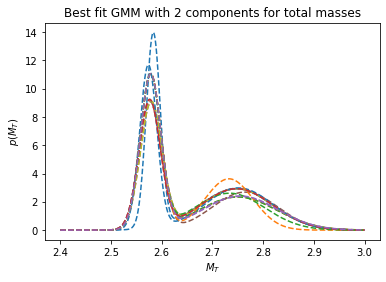

In [285]:
for i in M_T_LeaveOneOut:
    gm = GaussianMixture(n_components=2, random_state=111).fit(i.reshape(-1,1))
    logprob = gm.score_samples(x.reshape(-1, 1))
    responsibilities = gm.predict_proba(x.reshape(-1, 1))
    pdf = np.exp(logprob)
    pdf_individual = responsibilities * pdf[:, np.newaxis]
    plt.plot(x, pdf, '--')
plt.title('Best fit GMM with 2 components for total masses')
plt.xlabel('$M_T$')
plt.ylabel('$p(M_T)$')
plt.show()

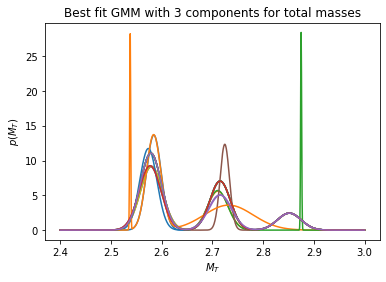

In [286]:
for i in M_T_LeaveOneOut:
    gm = GaussianMixture(n_components=3, random_state=111).fit(i.reshape(-1,1))
    logprob = gm.score_samples(x.reshape(-1, 1))
    responsibilities = gm.predict_proba(x.reshape(-1, 1))
    pdf = np.exp(logprob)
    pdf_individual = responsibilities * pdf[:, np.newaxis]
    plt.plot(x, pdf, '-')
plt.title('Best fit GMM with 3 components for total masses')
plt.xlabel('$M_T$')
plt.ylabel('$p(M_T)$')
plt.show()

# Bayesian evidencing

In [480]:
# import the Model class from CPNest
from cpnest.model import Model

# import cpnest
import cpnest
from time import time               # use for timing functions

import corner

## Gaussian distribution

In [550]:
# set the model, likelihood and prior
class SingleGaussianModel(Model):
    """
    A simple straight line model, with a Gaussian likelihood.
    
    Args:
        data (:class:`numpy.ndarray`): an array containing the observed data
        abscissa (:class:`numpy.ndarray`): an array containing the points at which the data were taken
        modelfunc (function): a function defining the model
        sigma (float): the standard deviation of the noise in the data
        
    """
    names = ['loc','scale'] # parameter names (this is a required variables for the class)

    # define the boundaries using for initial sampling of the live points
    loc_mu = 2.67     # mean of the Gaussian prior on m
    loc_sigma = 0.04 # standard deviation of the Gaussian prior on m

    scale_mu = 0.10
    scale_sigma = 0.03
    # set the m bounds to be +/- 10sigma about the mean
    mbounds = [loc_mu-loc_sigma, loc_mu+loc_sigma]
    
    scale_bounds = [scale_mu-scale_sigma, scale_mu+scale_sigma]
    # NOTE: the bounds could instead be set through arguments passed to the __init__
    # function for the class if wanted
    bounds=[mbounds, scale_bounds] # upper and lower bounds on each parameter (required for the class)

    def __init__(self, data):
        # set the data
        self._data = data         # oberserved data
        self._ndata = len(data)   # number of data points
        
    def log_likelihood(self, params):
        """
        The natural logarithm of the likelihood function.

        Args:
            params (dict): a dictionary keyed to the parameter names.

        Returns:
            float: the log likelihood value.
        """
        # extract the parameters
        loc = params['loc']
        scale = params['scale']

        return -0.5 * np.sum(np.log(2*np.pi*(scale**2))+(loc-self._data)**2 / scale**2)

    
    def log_prior(self,p):
        """
        The natural logarithm of the prior function.

        Args:
            p (dict): a dictionary keyed to parameter names.

        Returns:
            float: The log prior value.
        """
        # the uniform priors are dealt with by just checking that we're within the bounds
        if not self.in_bounds(p): return -np.inf # check parameters are all in bounds
    
        return 0.0

In [551]:
%%capture

print('CPNest version: {}'.format(cpnest.__version__))

nlive = 1024      # number of live point
maxmcmc = 1024    # maximum MCMC chain length
nthreads = 1      # use one CPU core

# set up the algorithm
work1 = cpnest.CPNest(SingleGaussianModel(M_T), verbose=0,
                     nthreads=nthreads, nlive=nlive, maxmcmc=maxmcmc);
# run the algorithm
t0 = time()
work1.run();
t1 = time()

timecpnest = (t1-t0)

2021-03-29, 04:19:55 - cpnest.cpnest.CPNest                  : Running with 1 parallel threads
2021-03-29, 04:20:01 - cpnest.sampler.Sampler                : Sampler process 227448: MCMC samples accumulated = 163655
2021-03-29, 04:20:01 - cpnest.sampler.Sampler                : Sampler process 227448 - mean acceptance 0.527: exiting
2021-03-29, 04:20:01 - cpnest.NestedSampling.NestedSampler   : Final evidence: 12.62
2021-03-29, 04:20:01 - cpnest.NestedSampling.NestedSampler   : Information: 0.16
2021-03-29, 04:20:01 - cpnest.nest2pos                       : Computed log_evidences: (12.623546148915537,)
2021-03-29, 04:20:01 - cpnest.nest2pos                       : Relative weights of input files: [1.0]
2021-03-29, 04:20:01 - cpnest.nest2pos                       : Relative weights of input files taking into account their length: [1.0]
2021-03-29, 04:20:01 - cpnest.nest2pos                       : Number of input samples: [4177]
2021-03-29, 04:20:01 - cpnest.nest2pos                    

In [552]:
print("Time taken to run 'CPNest' is {} seconds".format(timecpnest))

Time taken to run 'CPNest' is 6.05272364616394 seconds


In [554]:
logZcpnest = work1.NS.logZ                     # value of log Z
infogaincpnest = work1.NS.state.info           # value of the information gain
logZerrcpnest = np.sqrt(infogaincpnest/nlive) # estimate of the statistcal uncertainty on logZ

# get the null log likelihood (evidence that the data is Gaussian noise with zero mean, and given standard devaition)
#logZnull = work.user.log_likelihood({'loc': 0., 'scale': 0.})

print("log(Z) = {} ± {}".format(logZcpnest, logZerrcpnest))

# output the log Bayes factor
#print('log Bayes factor is {}'.format(logZcpnest - logZnull))

log(Z) = 12.623812791258645 ± 0.012449703075376585


Number of posterior samples is 2051


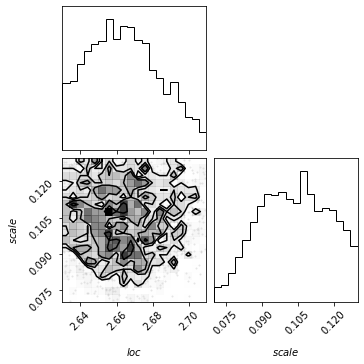

In [555]:
locchain_cpnest = work1.posterior_samples['loc'] # extract chain of m values
sigmachain_cpnest = work1.posterior_samples['scale'] # extract chain if c values

samples_cpnest = np.vstack((locchain_cpnest, sigmachain_cpnest)).T

# print out the number of posterior samples
print('Number of posterior samples is {}'.format(samples_cpnest.shape[0]))

# plot using corner.py
fig = corner.corner(
    samples_cpnest, 
    labels=[r'$loc$', r'$scale$'], 
    hist_kwargs={'density': True}
)

## GMM2

In [556]:
# set the model, likelihood and prior
class GaussianMixturModel2(Model):
    """
    A simple straight line model, with a Gaussian likelihood.
    
    Args:
        data (:class:`numpy.ndarray`): an array containing the observed data
        abscissa (:class:`numpy.ndarray`): an array containing the points at which the data were taken
        modelfunc (function): a function defining the model
        sigma (float): the standard deviation of the noise in the data
        
    """
    
    names = ['loc1','scale1','loc2','scale2', 'weight'] # parameter names (this is a required variables for the class)

    # define the boundaries using for initial sampling of the live points
    loc1_mu = 2.58     # mean of the Gaussian prior on m
    loc1_sigma = 0.07 # standard deviation of the Gaussian prior on m

    scale1_mu = 0.02
    scale1_sigma = 0.09
    
    loc2_mu = 2.72
    loc2_sigma = 0.08
    
    scale2_mu = 0.09
    scale2_sigma = 0.05
    
    cov1_mu = 0.42
    cov1_sigma = 0.42

    
    # set the m bounds to be +/- 10sigma about the mean
    loc1_bounds = [loc1_mu-loc1_sigma, loc1_mu+loc1_sigma]
    scale1_bounds = [scale1_mu-scale1_sigma, scale1_mu+scale1_sigma]
    loc2_bounds = [loc2_mu-loc2_sigma, loc2_mu+loc2_sigma]
    scale2_bounds = [scale2_mu-scale2_sigma, scale2_mu+scale2_sigma]
    weight_bounds = [0, 1]
    
    # NOTE: the bounds could instead be set through arguments passed to the __init__
    # function for the class if wanted
    bounds = [
        loc1_bounds, scale1_bounds, 
        loc2_bounds, scale2_bounds, 
        weight_bounds
    ] # upper and lower bounds on each parameter (required for the class)
    
    def __init__(self, data):
        # set the data
        self._data = data         # oberserved data
        self._ndata = len(data)   # number of data points
        
    def log_likelihood(self, x):
        """
        The natural logarithm of the likelihood function.

        Args:
            params (dict): a dictionary keyed to the parameter names.

        Returns:
            float: the log likelihood value.
        """

        # extract the parameters
        w = x['weight']
        
        logL = (
            np.sum(
                [np.logaddexp(
                    np.log(w)-0.5*((d-x['loc1'])/x['scale1'])**2,
                    np.log(1.0-w)-0.5*((d-x['loc2'])/x['scale2'])**2
                ) for d in self._data ]
            )
        )
        
        return logL 
    
    def log_prior(self,p):
        """
        The natural logarithm of the prior function.

        Args:
            p (dict): a dictionary keyed to parameter names.

        Returns:
            float: The log prior value.
        """

        # the uniform priors are dealt with by just checking that we're within the bounds
        if not self.in_bounds(p): return -np.inf # check parameters are all in bounds

        return 0

In [557]:
%%capture

print('CPNest version: {}'.format(cpnest.__version__))

nlive = 1024      # number of live point
maxmcmc = 1024    # maximum MCMC chain length
nthreads = 8     # use one CPU core

# set up the algorithm
work2 = cpnest.CPNest(GaussianMixturModel2(M_T), verbose=0,
                     nthreads=nthreads, nlive=nlive, maxmcmc=maxmcmc);
# run the algorithm
t0 = time()
work2.run();
t1 = time()

timecpnest = (t1-t0)

2021-03-29, 04:20:34 - cpnest.cpnest.CPNest                  : Running with 8 parallel threads
2021-03-29, 04:21:49 - cpnest.sampler.Sampler                : Sampler process 227529: MCMC samples accumulated = 991862
2021-03-29, 04:21:49 - cpnest.sampler.Sampler                : Sampler process 227515: MCMC samples accumulated = 1046858
2021-03-29, 04:21:49 - cpnest.sampler.Sampler                : Sampler process 227529 - mean acceptance 0.315: exiting
2021-03-29, 04:21:49 - cpnest.sampler.Sampler                : Sampler process 227527: MCMC samples accumulated = 582614
2021-03-29, 04:21:49 - cpnest.sampler.Sampler                : Sampler process 227515 - mean acceptance 0.304: exiting
2021-03-29, 04:21:49 - cpnest.sampler.Sampler                : Sampler process 227489: MCMC samples accumulated = 1009964
2021-03-29, 04:21:49 - cpnest.sampler.Sampler                : Sampler process 227491: MCMC samples accumulated = 643789
2021-03-29, 04:21:49 - cpnest.sampler.Sampler               

In [558]:
print("Time taken to run 'CPNest' is {} seconds".format(timecpnest))

Time taken to run 'CPNest' is 77.05596089363098 seconds


In [559]:
logZcpnest = work2.NS.logZ                     # value of log Z
infogaincpnest = work2.NS.state.info           # value of the information gain
logZerrcpnest = np.sqrt(infogaincpnest/nlive) # estimate of the statistcal uncertainty on logZ

# get the null log likelihood (evidence that the data is Gaussian noise with zero mean, and given standard devaition)
#logZnull = work.user.log_likelihood({'loc': 0., 'scale': 0.})

print("log(Z) = {} ± {}".format(logZcpnest, logZerrcpnest))

# output the log Bayes factor
#print('log Bayes factor is {}'.format(logZcpnest - logZnull))

log(Z) = -8.666570633293578 ± 0.050852348697897


Number of posterior samples is 3929


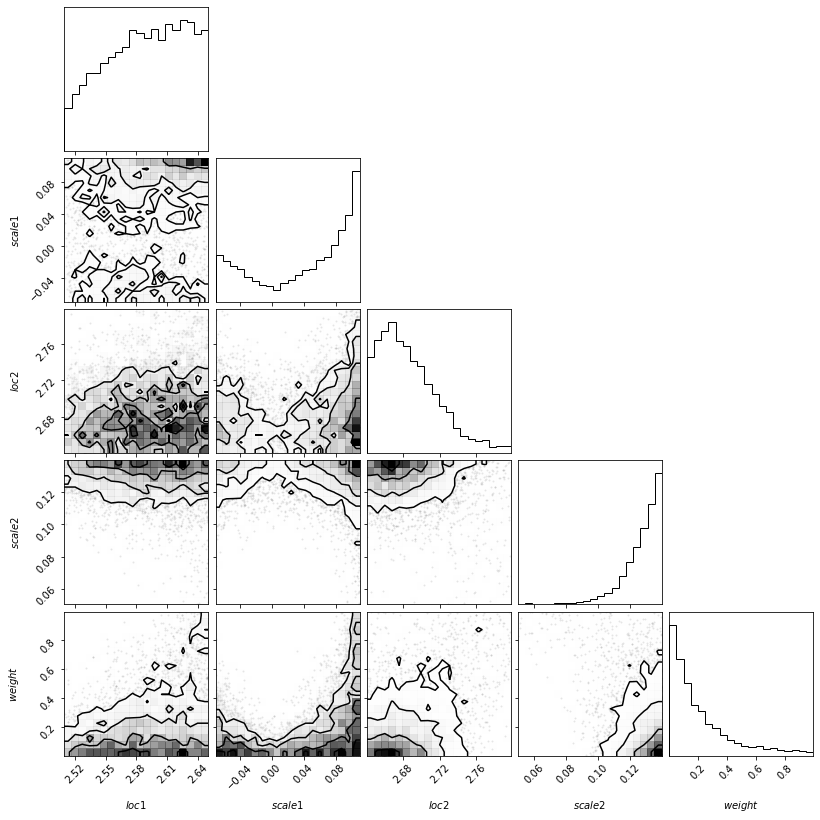

In [561]:
loc1chain_cpnest = work2.posterior_samples['loc1'] # extract chain of m values
sigma1chain_cpnest = work2.posterior_samples['scale1'] # extract chain if c values
loc2chain_cpnest = work2.posterior_samples['loc2'] # extract chain of m values
sigma2chain_cpnest = work2.posterior_samples['scale2'] # extract chain if c values
weightchain_cpnest = work2.posterior_samples['weight'] # extract chain of m values
samples_cpnest = np.vstack((loc1chain_cpnest, sigma1chain_cpnest, loc2chain_cpnest, sigma2chain_cpnest, weightchain_cpnest)).T

# print out the number of posterior samples
print('Number of posterior samples is {}'.format(samples_cpnest.shape[0]))

# plot using corner.py
plotposts(samples_cpnest)

## GMM3

In [564]:
# set the model, likelihood and prior
class GaussianMixtureModel3(Model):
    """
    A simple straight line model, with a Gaussian likelihood.
    
    Args:
        data (:class:`numpy.ndarray`): an array containing the observed data
        abscissa (:class:`numpy.ndarray`): an array containing the points at which the data were taken
        modelfunc (function): a function defining the model
        sigma (float): the standard deviation of the noise in the data
        
    """
    
    names = ['loc1','scale1','loc2','scale2', 'loc3', 'scale3', 'weight1', 'weight2'] # parameter names (this is a required variables for the class)

    # define the boundaries using for initial sampling of the live points
    loc1_mu = 2.57     # mean of the Gaussian prior on m
    loc1_sigma = 0.18 # standard deviation of the Gaussian prior on m

    scale1_mu = 0.02
    scale1_sigma = 0.12
    
    loc2_mu = 2.68
    loc2_sigma = 0.10
    
    scale2_mu = 0.05
    scale2_sigma = 0.09
    
    loc3_mu = 2.76
    loc3_sigma = 0.12
    
    scale3_mu = 0.08
    scale3_sigma = 0.1
    
    weight1_mu = 0.38
    weight1_sigma = 0.0
    
    weight2_mu = 0.35
    weight2_sigma = 0.0
    
    # set the m bounds to be +/- 10sigma about the mean
    loc1_bounds = [loc1_mu-loc1_sigma, loc1_mu+loc1_sigma]
    scale1_bounds = [scale1_mu-scale1_sigma, scale1_mu+scale1_sigma]
    loc2_bounds = [loc2_mu-loc2_sigma, loc2_mu+loc2_sigma]
    scale2_bounds = [scale2_mu-scale2_sigma, scale2_mu+scale2_sigma]
    loc3_bounds = [loc3_mu-loc3_sigma, loc3_mu+loc3_sigma]
    scale3_bounds = [scale3_mu-scale3_sigma, scale3_mu+scale3_sigma]
    weight1_bounds = [weight1_mu-weight1_sigma, weight1_mu+weight1_sigma]
    weight2_bounds = [weight2_mu-weight2_sigma, weight2_mu+weight2_sigma]
    
    # NOTE: the bounds could instead be set through arguments passed to the __init__
    # function for the class if wanted
    
    # upper and lower bounds on each parameter (required for the class)
    bounds = [
        loc1_bounds, scale1_bounds, 
        loc2_bounds, scale2_bounds, 
        loc3_bounds, scale3_bounds,  
        weight1_bounds, weight2_bounds
    ] 
    
    
    def __init__(self, data):
        # set the data
        self._data = data         # oberserved data
        self._ndata = len(data)   # number of data points
        
        
    def log_likelihood(self, x):
        """
        The natural logarithm of the likelihood function.

        Args:
            params (dict): a dictionary keyed to the parameter names.

        Returns:
            float: the log likelihood value.
        """

        # extract the parameters
        w1 = x['weight1']
        w2 = x['weight2']
        w3 = 1.0-w1-w2
        
        logL = (
            np.sum(
                [np.logaddexp(
                    np.log(w1)-0.5*((d-x['loc1'])/x['scale1'])**2,
                    np.log(w2)-0.5*((d-x['loc2'])/x['scale2'])**2,
                    np.log(w3)-0.5*((d-x['loc3'])/x['scale3'])**2
                ) for d in self._data ]
            )
        )
        
        return logL 
    
    def log_prior(self,p):
        """
        The natural logarithm of the prior function.

        Args:
            p (dict): a dictionary keyed to parameter names.

        Returns:
            float: The log prior value.
        """

        # the uniform priors are dealt with by just checking that we're within the bounds
        if not self.in_bounds(p): return -np.inf # check parameters are all in bounds

        return 0

In [ ]:
%%capture
print('CPNest version: {}'.format(cpnest.__version__))

nlive = 1024      # number of live point
maxmcmc = 1024    # maximum MCMC chain length
nthreads = 8     # use one CPU core

# set up the algorithm
work3 = cpnest.CPNest(GaussianMixtureModel3(M_T), verbose=0,
                     nthreads=nthreads, nlive=nlive, maxmcmc=maxmcmc);

# run the algorithm
t0 = time()
work3.run();
t1 = time()

timecpnest = (t1-t0)

2021-03-29, 04:27:41 - cpnest.cpnest.CPNest                  : Running with 8 parallel threads


In [ ]:
print("Time taken to run 'CPNest' is {} seconds".format(timecpnest))

In [ ]:
logZcpnest = work3.NS.logZ                     # value of log Z
infogaincpnest = work3.NS.state.info           # value of the information gain
logZerrcpnest = np.sqrt(infogaincpnest/nlive) # estimate of the statistcal uncertainty on logZ

# get the null log likelihood (evidence that the data is Gaussian noise with zero mean, and given standard devaition)
#logZnull = work.user.log_likelihood({'loc': 0., 'scale': 0.})

print("log(Z) = {} ± {}".format(logZcpnest, logZerrcpnest))

# output the log Bayes factor
#print('log Bayes factor is {}'.format(logZcpnest - logZnull))

In [ ]:
loc1chain_cpnest = work3.posterior_samples['loc1'] # extract chain of m values
sigma1chain_cpnest = work3.posterior_samples['scale1'] # extract chain if c values
loc2chain_cpnest = work3.posterior_samples['loc2'] # extract chain of m values
sigma2chain_cpnest = work3.posterior_samples['scale2'] # extract chain if c values
weightchain_cpnest = work3.posterior_samples['weight'] # extract chain of m values
samples_cpnest = np.vstack((loc1chain_cpnest, sigma1chain_cpnest, loc2chain_cpnest, sigma2chain_cpnest, weightchain_cpnest)).T

# print out the number of posterior samples
print('Number of posterior samples is {}'.format(samples_cpnest.shape[0]))

# plot using corner.py
plotposts(samples_cpnest)